In [1]:
# importing various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in the file
df  =  pd.read_excel("C:/Users/Kwame/Desktop/DS/HubbleMind/ObesityDataSet_raw_and_data_sinthetic.xlsx")
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [3]:
# checked to see the number of rows and columns
df.shape

(2111, 17)

In [4]:
# checked to see the data types within the dataset
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [5]:
# checked for the various variables
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
# Tried to get an understanding of the data by giving an overview of the numerical variables in the data.
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# checked for null values within the various variables
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
# checked for the number of duplicate values within the dataset
df.duplicated().sum()

24

In [9]:
# identified 24 duplicates and removed them
df.drop_duplicates(inplace=True)
df.shape

(2087, 17)

In [10]:
# for the various categorical variables, I checked for the number of unique values of those variables
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [15]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [18]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [19]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

# Exploratory Analysis 

<AxesSubplot:ylabel='NObeyesdad'>

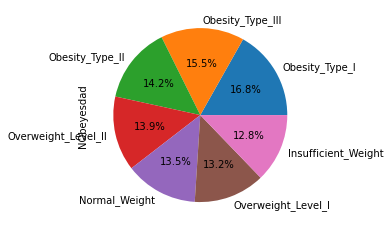

In [20]:
# Distribution of the target variable
data = df['NObeyesdad'].value_counts()
data.plot(kind='pie', autopct="%0.1f%%")

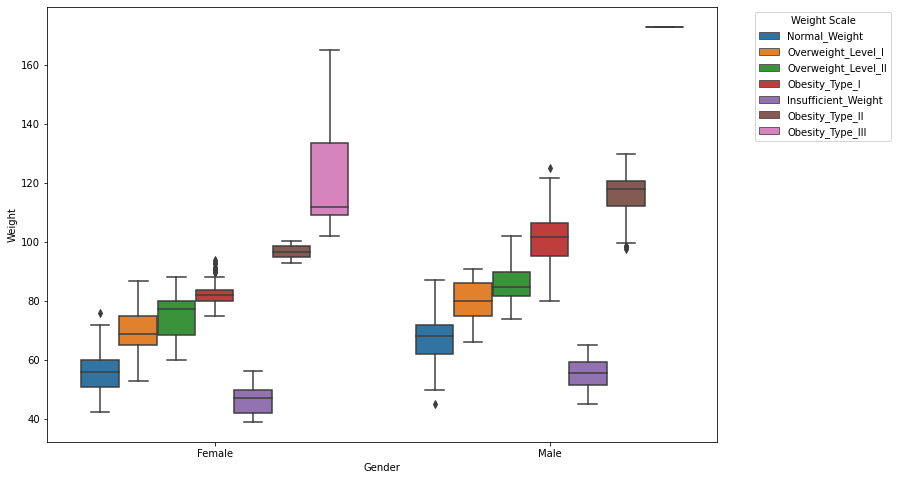

In [21]:
# Using a boxplot to compare the weight of males and females
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Weight', hue='NObeyesdad', data=df)
plt.legend(title='Weight Scale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

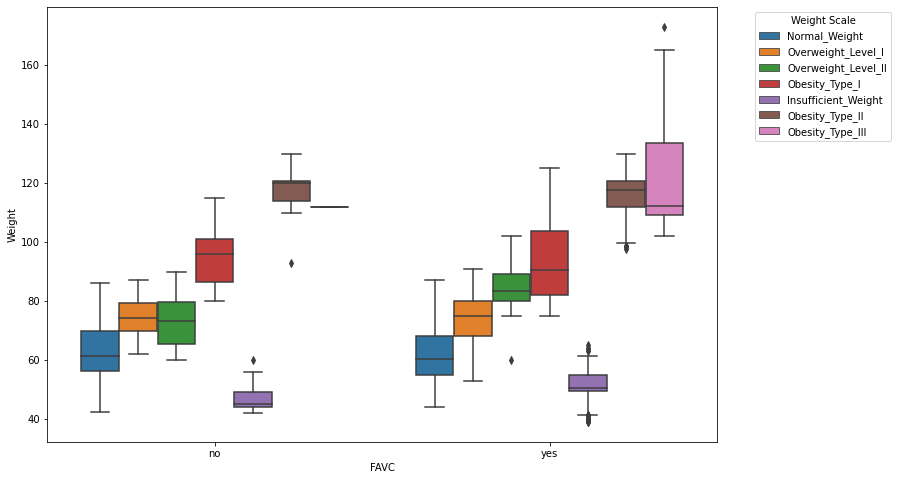

In [22]:
# Using a boxplot to observe the relationship between eating high-calorie food frequently and weight
plt.figure(figsize=(12, 8))
sns.boxplot(x='FAVC', y='Weight', hue='NObeyesdad', data=df)
plt.legend(title='Weight Scale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

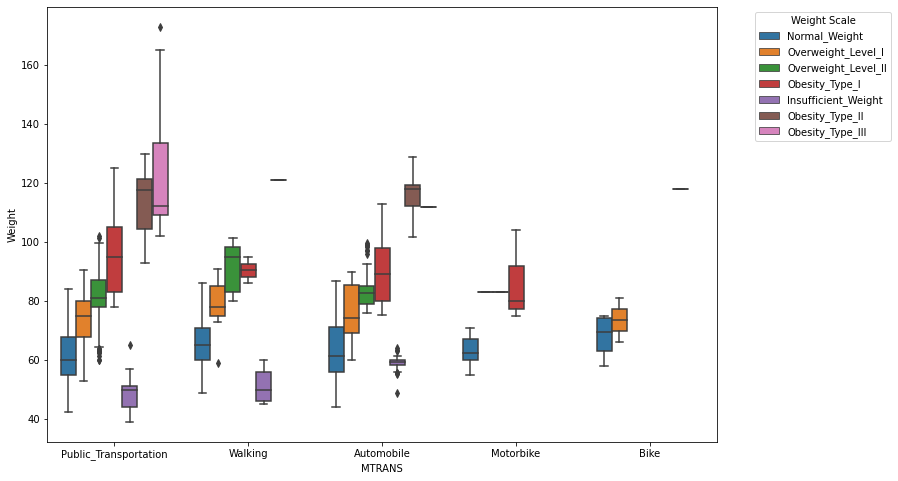

In [23]:
# Observing the relationship between the various modes of transportation and obesity levels
plt.figure(figsize=(12, 8))
sns.boxplot(x='MTRANS', y='Weight', hue='NObeyesdad', data=df)
plt.legend(title='Weight Scale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

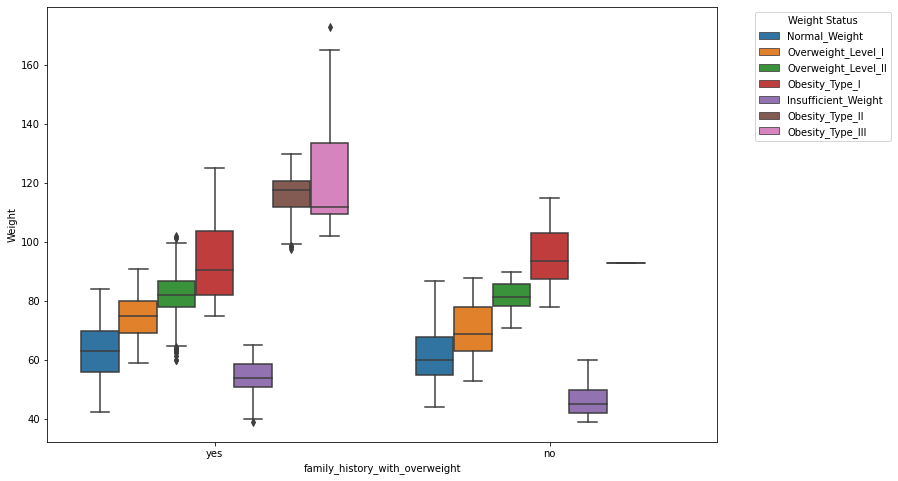

In [24]:
# Observing the relationship between family history and obesity levels
plt.figure(figsize=(12, 8))
sns.boxplot(x='family_history_with_overweight', y='Weight', hue='NObeyesdad', data=df)
plt.legend(title='Weight Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

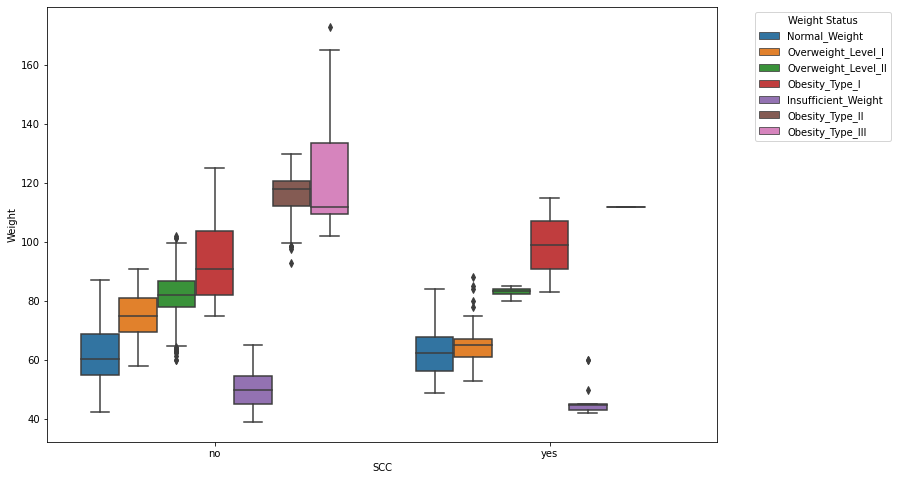

In [25]:
# Observing the relationship between monitoring calory intake and obesity levels
plt.figure(figsize=(12, 8))
sns.boxplot(x='SCC', y='Weight', hue='NObeyesdad', data=df)
plt.legend(title='Weight Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
# looking at the relationship between the continuous variables and the target variable

In [27]:
numerical_feats = []

for column in df.columns :
    if df[column].dtype == 'float64':
        numerical_feats.append(column)
        
print(numerical_feats)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


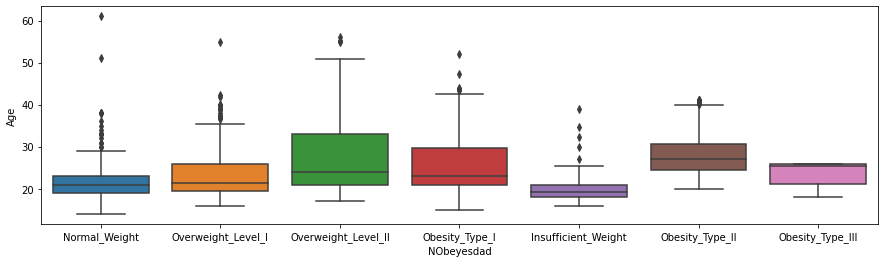

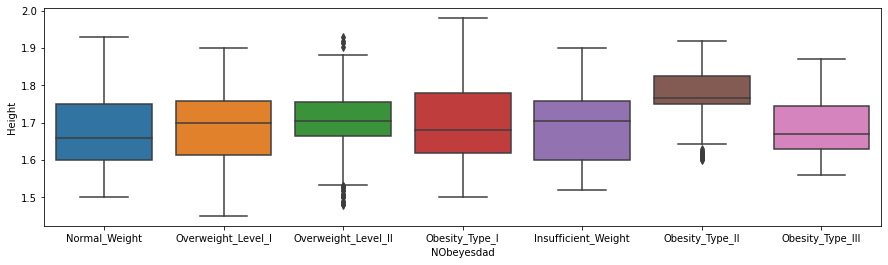

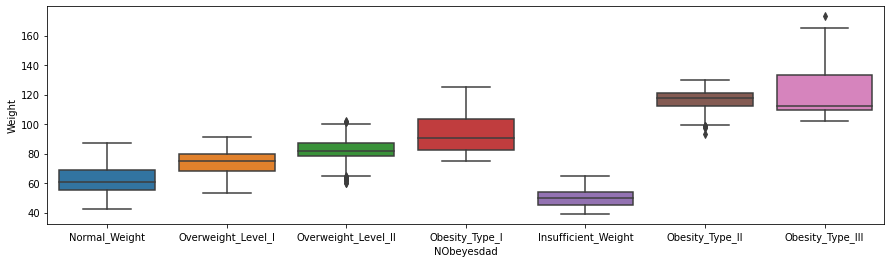

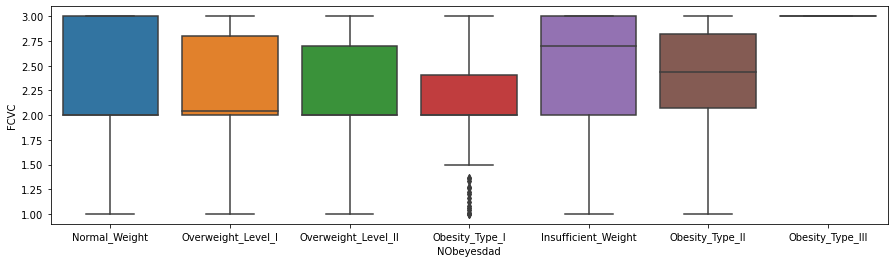

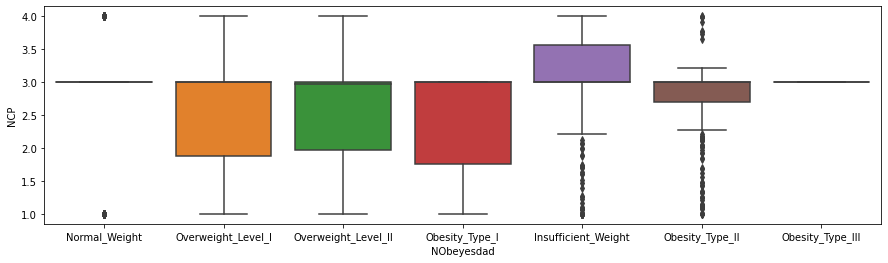

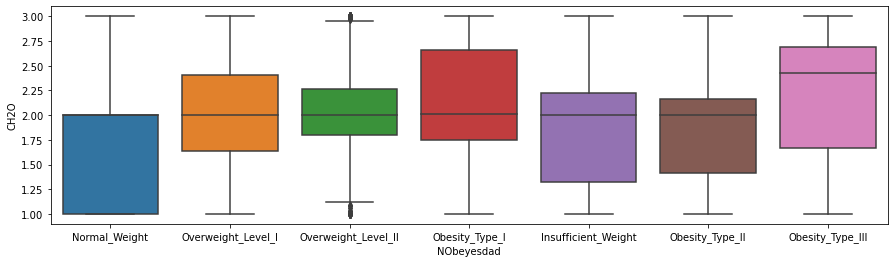

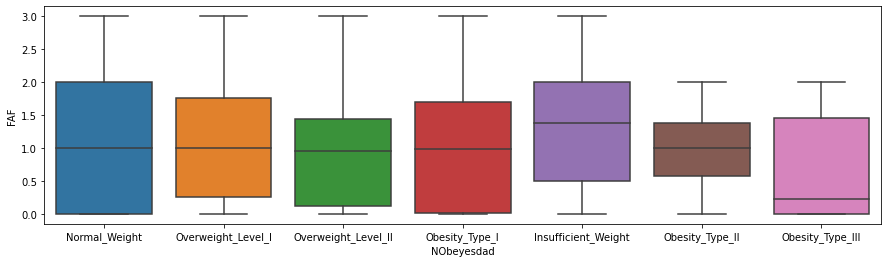

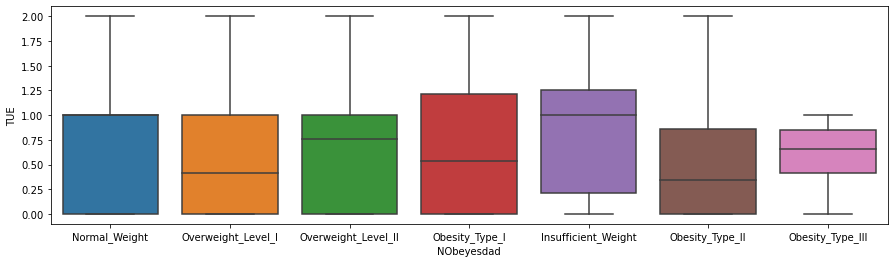

In [28]:
for feature in numerical_feats:
    plt.figure(figsize=(15, 4))
    sns.boxplot(x='NObeyesdad', y=feature, data=df)
    plt.show()

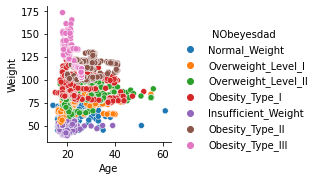

In [29]:
# A scatter plot to observe the relationship between Age and Weight
sns.pairplot(data=df,x_vars='Age', y_vars='Weight', hue=('NObeyesdad'))

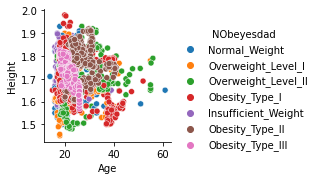

In [30]:
# A scatter plot to observe the relationship between Age and Height
sns.pairplot(data=df,x_vars='Age', y_vars='Height', hue=('NObeyesdad'))

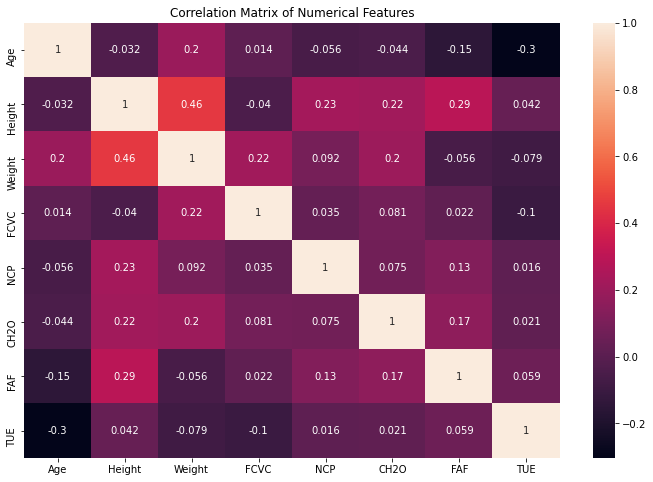

In [31]:
corr_matrix = df[numerical_feats].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:
###Enconding the categorical variables

In [33]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

In [34]:
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [35]:
df['family_history_with_overweight'] =  df['family_history_with_overweight'].map({'yes': 1, 'no': 0})

In [36]:
df['FAVC'] =  df['FAVC'].map({'yes': 1, 'no': 0})

In [37]:
df['CAEC'] =  df['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [38]:
df['SMOKE'] =  df['SMOKE'].map({'yes': 1, 'no': 0})

In [39]:
df['SCC'] =  df['SCC'].map({'yes': 1, 'no': 0})

In [40]:
df['CALC'] =  df['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [41]:
df['NObeyesdad'] =  df['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
       'Obesity_Type_I': 4, 'Obesity_Type_II': 5,'Obesity_Type_III': 6})

In [42]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,1
1,2,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,3


In [43]:
# For the variable 'MTRANS', it is not binary and does not have any form or order or progression so I used one hot encoding is used. 
df = pd.get_dummies(df, columns=['MTRANS'], drop_first=True)
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,2,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,0,0,1,0
1,2,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,0,0,1,0


In [44]:
# Inspected the columns 
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'NObeyesdad', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [45]:
### Outlier detection and Handling

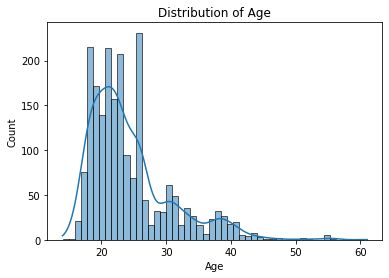

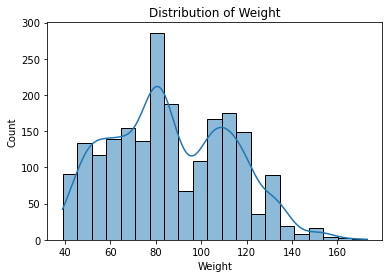

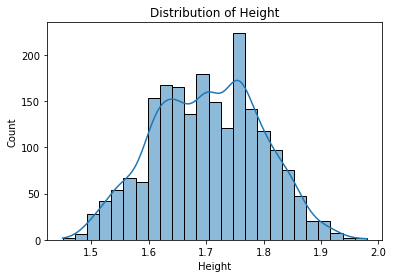

In [46]:
### Checking for normality of the continuous varables to be scaled

continuous_vars = ['Age', 'Weight', 'Height']

# Visualize distribution of continuous variables
for var in continuous_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

In [46]:
df_sub = df[['Age','Weight', 'Height']]
df_sub.columns

Index(['Age', 'Weight', 'Height'], dtype='object')

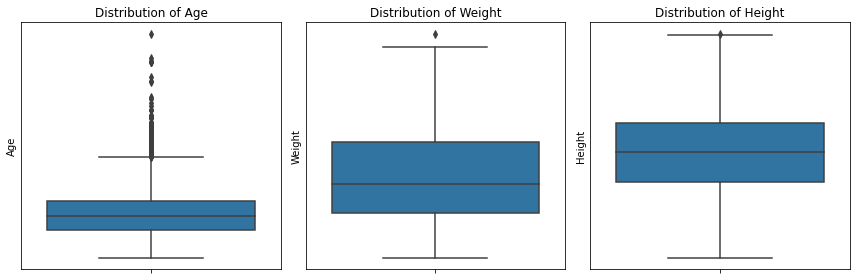

In [47]:
# created a boxplot for Age, Weight and Height to be able to observe the presence of outliers more closely
columns_to_scale =df_sub.columns
plt.figure(figsize = (12, 4))

for i in range(len(df_sub.columns)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = columns_to_scale[i], data = df_sub)
    plt.title("Distribution of "+ columns_to_scale[i])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

In [48]:
# Given that some outliers, though legitimate, have been identified for 'Age' and 'Weight', I 
# decided to keep them and use a Robust Scaler. I also included Height 
#from sklearn.preprocessing import RobustScaler

In [49]:
# Using the robust scaler to convert Age and Weight
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Apply Robust Scaler to the 'Age' and 'Weight' columns and replace the original values
df[['Age', 'Weight']] = scaler.fit_transform(df[['Age', 'Weight']]) 
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,2,-0.303682,1.62,-0.454616,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,0,0,1,0
1,2,-0.303682,1.52,-0.645020,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,0,0,1,0
2,1,0.025046,1.80,-0.145209,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,0,0,1,0
3,1,0.682502,1.80,0.092796,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,0,0,0,1
4,1,-0.139318,1.78,0.159437,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,0,0,1,0


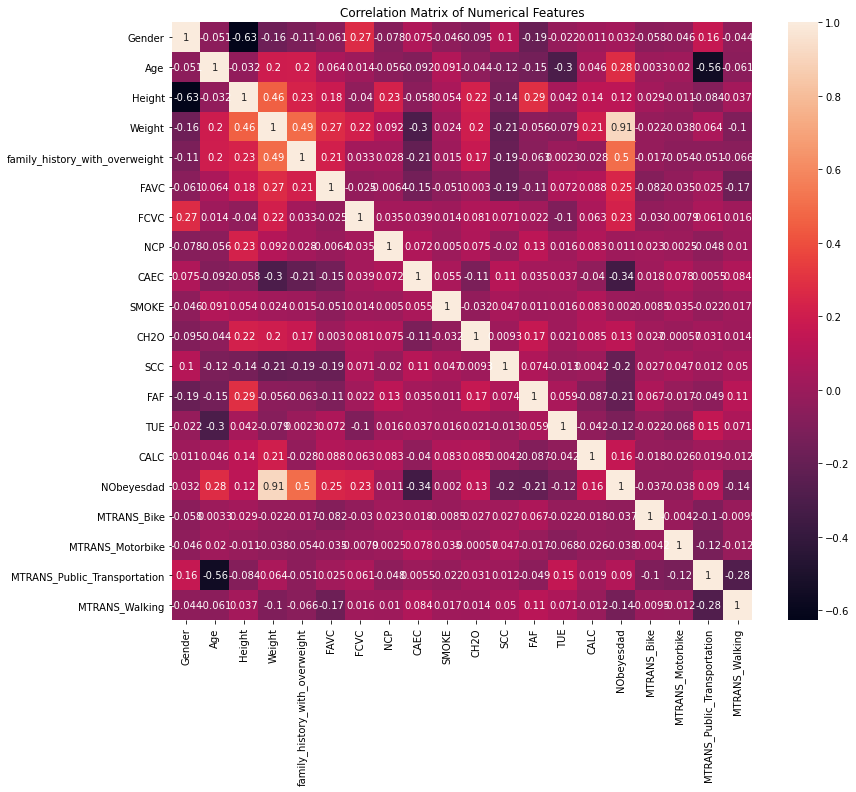

In [50]:
# Had to now create a heat map to observe the relationship between the variables
corr_matrix = df.corr()
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [51]:
# checking for numeric features that are statistically significant 
from sklearn.feature_selection import f_classif

# Numeric variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

X_numeric = df[continuous_vars]  # Extracting the numeric variables
y = df['NObeyesdad']  # The target variable

# Apply ANOVA (F-test)
f_stat, p_vals = f_classif(X_numeric, y)

# Create a DataFrame to display the p-values for each variable
anova_results = pd.DataFrame({'Feature': continuous_vars, 'p_value': p_vals})

# Filter the features that are statistically significant (p-value < 0.05)
significant_features = anova_results[anova_results['p_value'] < 0.05]

print(f"Statistically significant numeric features:\n{significant_features}")

Statistically significant numeric features:
  Feature        p_value
0     Age   3.246862e-86
1  Height   2.518501e-43
2  Weight   0.000000e+00
3    FCVC  3.796507e-121
4     NCP   7.132002e-31
5    CH2O   4.297247e-17
6     FAF   1.155420e-20
7     TUE   1.772380e-08


In [52]:
# checking for categorical features that are statistically significant 
from sklearn.feature_selection import chi2

# Categorical variables
other_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 
              'SCC', 'CALC', 'MTRANS_Bike', 'MTRANS_Motorbike', 
              'MTRANS_Public_Transportation', 'MTRANS_Walking']

X_categorical = df[other_vars]  # Extracting the categorical variables
y = df['NObeyesdad']  # The target variable

# One-hot encode the categorical variables for the Chi-Square test
X_categorical_encoded = pd.get_dummies(X_categorical)

# Apply Chi-Square test
chi2_stat, p_vals = chi2(X_categorical_encoded, y)

# Create a DataFrame to display the p-values for each variable
chi2_results = pd.DataFrame({'Feature': X_categorical_encoded.columns, 'p_value': p_vals})

# Filter the features that are statistically significant (p-value < 0.05)
significant_features = chi2_results[chi2_results['p_value'] < 0.05]

print(f"Statistically significant categorical features:\n{significant_features}")

Statistically significant categorical features:
                           Feature       p_value
0                           Gender  2.173871e-21
1   family_history_with_overweight  5.260990e-21
2                             FAVC  1.493320e-04
3                             CAEC  3.643468e-13
4                            SMOKE  2.338777e-05
5                              SCC  5.782949e-24
6                             CALC  1.425133e-12
7                      MTRANS_Bike  1.846524e-02
8                 MTRANS_Motorbike  3.500167e-03
9     MTRANS_Public_Transportation  1.212847e-06
10                  MTRANS_Walking  1.853776e-18


In [53]:
# Had to separate the target variable for the others
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [54]:
# Inpected the separation
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [55]:
# Had to now split the dataset into training and testing
from sklearn.model_selection import train_test_split
# Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [56]:
# Imported the Random Forest classifier for use
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
# Fitted for the random forest classifier to the training dataset
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [58]:
# Make predictions on the test set
y_pred = rf.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9090909090909091
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.77      0.82      0.80        57
           2       0.81      0.85      0.83        55
           3       0.96      0.86      0.91        58
           4       0.91      0.97      0.94        70
           5       1.00      0.95      0.97        60
           6       1.00      0.98      0.99        65

    accuracy                           0.91       418
   macro avg       0.91      0.90      0.91       418
weighted avg       0.91      0.91      0.91       418

Confusion Matrix: [[47  4  2  0  0  0  0]
 [ 4 47  6  0  0  0  0]
 [ 0  6 47  1  1  0  0]
 [ 0  3  2 50  3  0  0]
 [ 0  0  1  1 68  0  0]
 [ 0  0  0  0  3 57  0]
 [ 0  1  0  0  0  0 64]]


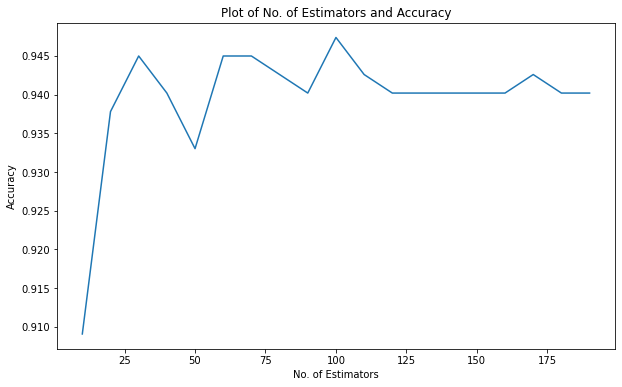

In [59]:
# Plotted a graph of the number of estimators and accuracy for hyperparamter tuning
estimators = []
scores = []

# Build classifiers
for k in range(10, 200, 10):
    estimators.append(k)
    RF_classifier = RandomForestClassifier(n_estimators=k, random_state=0)
    RF_classifier.fit(x_train, y_train)
    score_new = RF_classifier.score(x_test, y_test)
    scores.append(score_new)

# plot accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(estimators, scores)
plt.xlabel('No. of Estimators')
plt.ylabel('Accuracy')
plt.title('Plot of No. of Estimators and Accuracy')
plt.show()

In [60]:
# Based on the graph, the number of estimators was set at 100 for the second model
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [61]:
# Make predictions on the test set
y_pred = rf.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.83      0.96      0.89        57
           2       0.91      0.91      0.91        55
           3       0.98      0.84      0.91        58
           4       0.96      1.00      0.98        70
           5       0.98      0.97      0.97        60
           6       0.98      0.98      0.98        65

    accuracy                           0.95       418
   macro avg       0.95      0.94      0.95       418
weighted avg       0.95      0.95      0.95       418

Confusion Matrix: [[50  3  0  0  0  0  0]
 [ 0 55  1  1  0  0  0]
 [ 0  5 50  0  0  0  0]
 [ 0  3  4 49  2  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  0  1 58  1]
 [ 0  0  0  0  0  1 64]]


In [62]:
# Perform cross-validation to ascertain how well the model can generalise 

from sklearn.model_selection import cross_val_score


# Perform cross-validation (cv=5 means 5-fold cross-validation)
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean of the accuracy
mean_accuracy = np.mean(cv_scores)

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {mean_accuracy}")

Cross-validation accuracy scores: [0.9491018  0.94011976 0.95808383 0.95808383 0.95195195]
Mean accuracy: 0.9514682347017676


In [63]:
# Imported the K-Nearest Classifier for use
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# For the based model, n was set at 4 and fitted the classifier to the training dataset
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Fit the model
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [65]:
# Make predictions on the test set
y_pred = knn_classifier.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.8181818181818182
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.96      0.83        53
           1       0.83      0.42      0.56        57
           2       0.66      0.78      0.72        55
           3       0.76      0.78      0.77        58
           4       0.79      0.83      0.81        70
           5       0.98      0.93      0.96        60
           6       1.00      1.00      1.00        65

    accuracy                           0.82       418
   macro avg       0.82      0.81      0.81       418
weighted avg       0.83      0.82      0.81       418

Confusion Matrix: [[51  1  0  1  0  0  0]
 [13 24  9  6  5  0  0]
 [ 4  2 43  2  4  0  0]
 [ 2  1  7 45  3  0  0]
 [ 0  1  5  5 58  1  0]
 [ 0  0  1  0  3 56  0]
 [ 0  0  0  0  0  0 65]]


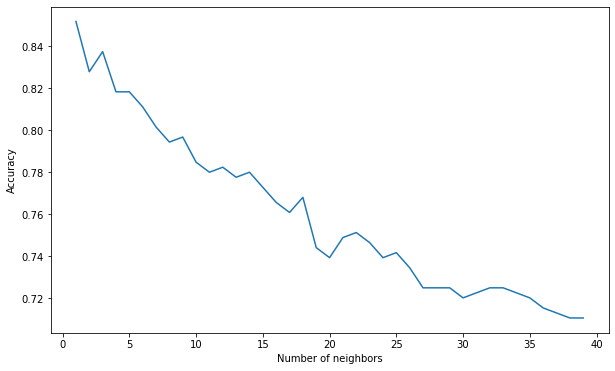

In [66]:
# Plotted a graph of the number of neighbours and accuracy for hyperparamter tuning
neighbors = []
scores = []

# Build classifiers
for k in range(1, 40, 1):
    neighbors.append(k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    score_new = knn_classifier.score(x_test, y_test)
    scores.append(score_new)

# plot accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [67]:
# Based on the graph, the number of neighbours was now set to 1
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
# Make predictions on the test set
y_pred = knn_classifier.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.8516746411483254
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.96      0.89        53
           1       0.85      0.51      0.64        57
           2       0.65      0.82      0.73        55
           3       0.74      0.78      0.76        58
           4       0.93      0.90      0.91        70
           5       0.98      0.97      0.97        60
           6       1.00      1.00      1.00        65

    accuracy                           0.85       418
   macro avg       0.85      0.85      0.84       418
weighted avg       0.86      0.85      0.85       418

Confusion Matrix: [[51  2  0  0  0  0  0]
 [ 8 29 12  8  0  0  0]
 [ 2  0 45  6  2  0  0]
 [ 1  2  9 45  1  0  0]
 [ 0  1  3  2 63  1  0]
 [ 0  0  0  0  2 58  0]
 [ 0  0  0  0  0  0 65]]


In [69]:
# Perform cross-validation (cv=5 means 5-fold cross-validation)
cv_scores = cross_val_score(knn_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean of the accuracy
mean_accuracy = np.mean(cv_scores)

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {mean_accuracy}")

Cross-validation accuracy scores: [0.82934132 0.82035928 0.83233533 0.85329341 0.82882883]
Mean accuracy: 0.8328316340292389


In [70]:
# Imported the XGBoost Classifier for use
from xgboost import XGBClassifier

In [71]:
# For the based model, the number of estimators was set at 100 and maximum depth set at 20 and fitted the classifier to the training dataset
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      0.93      0.93        57
           2       0.87      0.87      0.87        55
           3       0.94      0.88      0.91        58
           4       0.91      1.00      0.95        70
           5       0.98      0.95      0.97        60
           6       1.00      0.98      0.99        65

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

Confusion Matrix: [[53  0  0  0  0  0  0]
 [ 0 53  4  0  0  0  0]
 [ 0  4 48  3  0  0  0]
 [ 0  0  3 51  4  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  0  3 57  0]
 [ 0  0  0  0  0  1 64]]


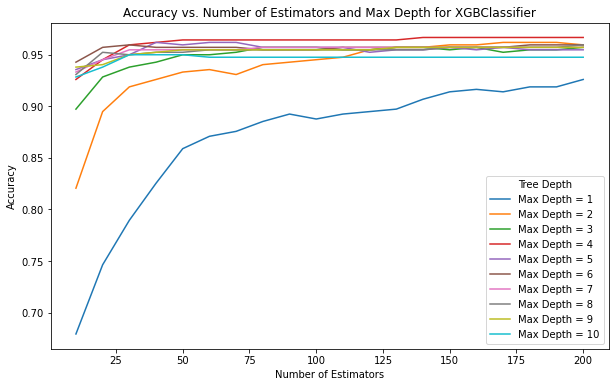

In [73]:
# Plotted a graph for hyperparamter tuning by observing the different max_depth and number of estimators
# Lists to store the results
estimators = []
depths = []
scores = []

# Hyperparameter tuning
for n_estimators in range(10, 201, 10):  # Vary number of estimators from 10 to 200
    for max_depth in range(1, 11):  # Vary max depth from 1 to 10
        estimators.append(n_estimators)
        depths.append(max_depth)
        
        # Train XGBClassifier with current hyperparameters
        xgb_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        xgb_classifier.fit(x_train, y_train)
        
        # Make predictions
        y_pred = xgb_classifier.predict(x_test)
        
        # Calculate accuracy
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

# Reshape the data for plotting
scores_array = np.array(scores).reshape(len(range(10, 201, 10)), len(range(1, 11)))

# Plotting the results
plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(range(1, 11)):
    plt.plot(range(10, 201, 10), scores_array[:, i], label=f'Max Depth = {max_depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators and Max Depth for XGBClassifier')
plt.legend(title='Tree Depth')
plt.show()

In [74]:
# Based on the graph, the number of estimators was set at 200 and max_depth to 4
xgb = XGBClassifier(random_state=42, n_estimators=200, max_depth=4)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9665071770334929
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.95      0.96        57
           2       0.94      0.93      0.94        55
           3       0.95      0.95      0.95        58
           4       0.93      1.00      0.97        70
           5       0.98      0.95      0.97        60
           6       1.00      0.98      0.99        65

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418

Confusion Matrix: [[53  0  0  0  0  0  0]
 [ 0 54  3  0  0  0  0]
 [ 0  2 51  2  0  0  0]
 [ 0  0  0 55  3  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  1  2 57  0]
 [ 0  0  0  0  0  1 64]]


In [75]:
# Perform cross-validation (cv=5 means 5-fold cross-validation)
cv_scores = cross_val_score(xgb, x_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean of the accuracy
mean_accuracy = np.mean(cv_scores)

# Print the cross-validation results

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {mean_accuracy}")

Cross-validation accuracy scores: [0.95209581 0.9760479  0.97305389 0.96706587 0.96396396]
Mean accuracy: 0.9664454874035713


In [76]:
# Imported gradient boosting classifier for use
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9497607655502392
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.95      0.95        57
           2       0.92      0.87      0.90        55
           3       0.91      0.90      0.90        58
           4       0.90      1.00      0.95        70
           5       0.98      0.93      0.96        60
           6       1.00      0.98      0.99        65

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

Confusion Matrix: [[53  0  0  0  0  0  0]
 [ 0 54  2  1  0  0  0]
 [ 0  3 48  4  0  0  0]
 [ 0  0  2 52  4  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  0  4 56  0]
 [ 0  0  0  0  0  1 64]]


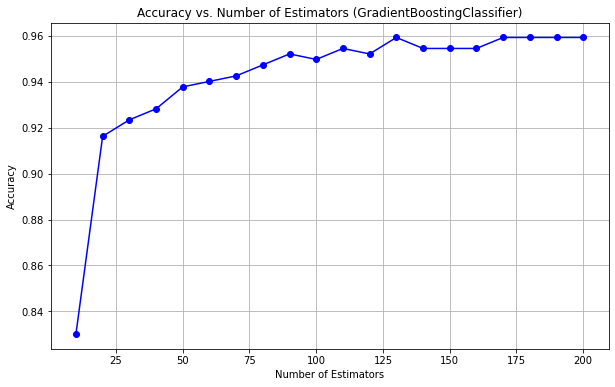

In [78]:
estimators = []
scores = []

# Hyperparameter tuning: vary the number of estimators
for n_estimators in range(10, 201, 10):  # Vary n_estimators from 10 to 200
    estimators.append(n_estimators)
    
    # Initialize GradientBoostingClassifier with n_estimators
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    gb_classifier.fit(x_train, y_train)
    
    # Make predictions
    y_pred = gb_classifier.predict(x_test)
    
    # Calculate accuracy
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimators, scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators (GradientBoostingClassifier)')
plt.grid(True)
plt.show()

In [81]:
gb_classifier = GradientBoostingClassifier(random_state=42,n_estimators=190)
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9593301435406698
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.95      0.96        57
           2       0.93      0.91      0.92        55
           3       0.93      0.93      0.93        58
           4       0.91      1.00      0.95        70
           5       0.98      0.93      0.96        60
           6       1.00      0.98      0.99        65

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

Confusion Matrix: [[53  0  0  0  0  0  0]
 [ 0 54  3  0  0  0  0]
 [ 0  1 50  4  0  0  0]
 [ 0  0  1 54  3  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  0  4 56  0]
 [ 0  0  0  0  0  1 64]]


In [82]:
# Perform cross-validation (cv=5 means 5-fold cross-validation)
cv_scores = cross_val_score(gb_classifier, x_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean of the accuracy
mean_accuracy = np.mean(cv_scores)

# Print the cross-validation results

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {mean_accuracy}")

Cross-validation accuracy scores: [0.9491018  0.96407186 0.96107784 0.95508982 0.96696697]
Mean accuracy: 0.9592616568664474
